## Research question 3
Does the quality of family relationships, parents' cohabitation status have an impact on alcohol consumption?

selected columns::
[['famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'guardian_father', 'guardian_mother', 'guardian_other', 'famsup_no', 'famsup_yes', 'Medu', 'Fedu']]

# Best Classifiers

## XGBoost
### Train Acc= 0.8957399103139013
### Test Acc= 0.7129186602870813

## Random Forest
### Train Acc= 0.9013452914798207
### Test Acc= 0.7129186602870813

## Soft Voting
### Test Acc= 0.7017937219730942
### Train Acc= 0.6411483253588517

## KNN(k=6)
### Train Acc= 0.750000
### Test Acc= 0.665072,

## Out of Bag on DecisionTree
### Train Acc= 0.0.9047085201793722
### Test Acc= 0.7416267942583732

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import scikitplot as skplt



from sklearn import set_config
#set_config(transform_output = "pandas")

## Function to save figures

In [2]:
from pathlib import Path
IMAGES_PATH = Path() / "images/question 3"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [3]:
# Import train and test sets
X_train = pd.read_csv('smoteTrainSet.csv')
X_test = pd.read_csv('ScaledTestSet.csv')

In [4]:
X_train.columns

Index(['sex_F', 'sex_M', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A',
       'Pstatus_T', 'Mjob_at_home', 'Mjob_health', 'Mjob_other',
       'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health',
       'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'guardian_father',
       'guardian_mother', 'guardian_other', 'schoolsup_no', 'schoolsup_yes',
       'famsup_no', 'famsup_yes', 'paid_no', 'paid_yes', 'activities_no',
       'activities_yes', 'higher_no', 'higher_yes', 'romantic_no',
       'romantic_yes', 'age', 'Medu', 'Fedu', 'studytime', 'failures',
       'famrel', 'freetime', 'goout', 'health', 'absences', 'avg_grade',
       'alc'],
      dtype='object')

In [5]:
X_train.shape

(892, 43)

In [6]:
# Separate target from dataset
y_train = X_train['alc']
#X_train = X_train.drop(columns = ['alc'])
X_train = X_train[['famsize_GT3', 'Pstatus_A', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'guardian_father', 'guardian_mother', 'guardian_other', 'famsup_yes', 'Medu', 'Fedu']] 
#[['famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'guardian_father', 'guardian_mother', 'guardian_other', 'famsup_no', 'famsup_yes', 'Medu', 'Fedu']] 
y_test = X_test['alc']
X_test = X_test[['famsize_GT3', 'Pstatus_A', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'guardian_father', 'guardian_mother', 'guardian_other', 'famsup_yes', 'Medu', 'Fedu']] 
#X_test = X_test.drop(columns = 'alc')

In [7]:
y_train.value_counts()

1.0    446
0.0    446
Name: alc, dtype: int64

## 0R classifier

In [8]:
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy = "most_frequent")



In [9]:
dummy.fit(X_train,y_train)

DummyClassifier(strategy='most_frequent')

In [10]:
from sklearn.metrics import accuracy_score
print('Train Accuracy', accuracy_score(y_train, dummy.predict(X_train)))
print('Test Accuracy', accuracy_score(y_test, dummy.predict(X_test)))

Train Accuracy 0.5
Test Accuracy 0.6076555023923444


## Finding suitable value of k for KNN

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepd

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepd

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepd

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepd

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepd

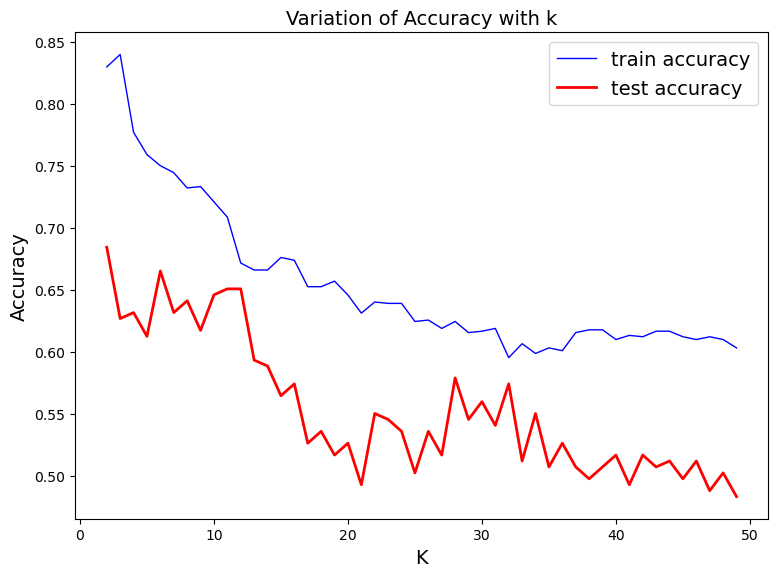

In [121]:
k = range(2, 50)
train_acc = []
test_acc = []
neighbors = []

for i in k:
    neighbors.append(i)
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(X_train, y_train)
    train_acc.append(accuracy_score(y_train, model.predict(X_train)))
    test_acc.append(accuracy_score(y_test, model.predict(X_test)))

plt.figure(figsize = (8,6))
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Variation of Accuracy with k')
plt.plot(neighbors, train_acc, color = 'blue', linewidth = 1,
         label = 'train accuracy');

plt.plot(neighbors, test_acc, color = 'red', linewidth = 2,
         label = 'test accuracy')
plt.legend()
save_fig('Accuracy against k')
plt.show();

In [122]:
pd.DataFrame({'K': neighbors, 'Train Acc': train_acc, 'Test Acc': test_acc})

K  Train Acc  Test Acc
0    2   0.829596  0.684211
1    3   0.839686  0.626794
2    4   0.776906  0.631579
3    5   0.758969  0.612440
4    6   0.750000  0.665072
5    7   0.744395  0.631579
6    8   0.732063  0.641148
7    9   0.733184  0.617225
8   10   0.720852  0.645933
9   11   0.708520  0.650718
10  12   0.671525  0.650718
11  13   0.665919  0.593301
12  14   0.665919  0.588517
13  15   0.676009  0.564593
14  16   0.673767  0.574163
15  17   0.652466  0.526316
16  18   0.652466  0.535885
17  19   0.656951  0.516746
18  20   0.645740  0.526316
19  21   0.631166  0.492823
20  22   0.640135  0.550239
21  23   0.639013  0.545455
22  24   0.639013  0.535885
23  25   0.624439  0.502392
24  26   0.625561  0.535885
25  27   0.618834  0.516746
26  28   0.624439  0.578947
27  29   0.615471  0.545455
28  30   0.616592  0.559809
29  31   0.618834  0.540670
30  32   0.595291  0.574163
31  33   0.606502  0.511962
32  34   0.598655  0.550239
33  35   0.603139  0.507177
34  36   0.600897  0.526316
35  37   0.615471  0.507177
36  38   0.617713  0.497608
37  39   0.617713  0.507177
38  40   0.609865  0.516746
39  41   0.613229  0.492823
40  42   0.612108  0.516746
41  43   0.616592  0.507177
42  44   0.616592  0.511962
43  45   0.612108  0.497608
44  46   0.609865  0.511962
45  47   0.612108  0.488038
46  48   0.609865  0.502392
47  49   0.603139  0.483254

## Applying suitable value of k in KNN Classifier

In [123]:
best_grid_knn= KNeighborsClassifier(n_neighbors=6)
best_grid_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.


[[91 36]
 [34 48]]
Accuracy Score 0.6650717703349283
Classification report:               precision    recall  f1-score   support

         0.0       0.73      0.72      0.72       127
         1.0       0.57      0.59      0.58        82

    accuracy                           0.67       209
   macro avg       0.65      0.65      0.65       209
weighted avg       0.67      0.67      0.67       209



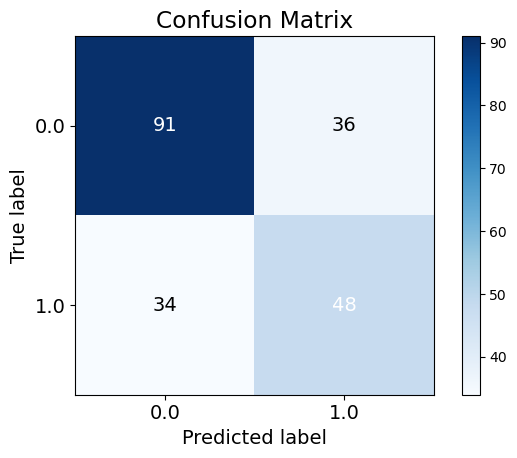

In [126]:
best_grid_knn.fit(X_train, y_train)
y_pred=best_grid_knn.predict(X_test)
print(confusion_matrix(y_test,y_pred))
skplt.metrics.plot_confusion_matrix(y_test, y_pred);
save_fig('Test Set Confusion Matrix for KNN hyper-para tuned q3')
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

Classification Report for Train Set
Accuracy Score 0.75
              precision    recall  f1-score   support

         0.0       0.71      0.85      0.77       446
         1.0       0.82      0.65      0.72       446

    accuracy                           0.75       892
   macro avg       0.76      0.75      0.75       892
weighted avg       0.76      0.75      0.75       892



Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepd

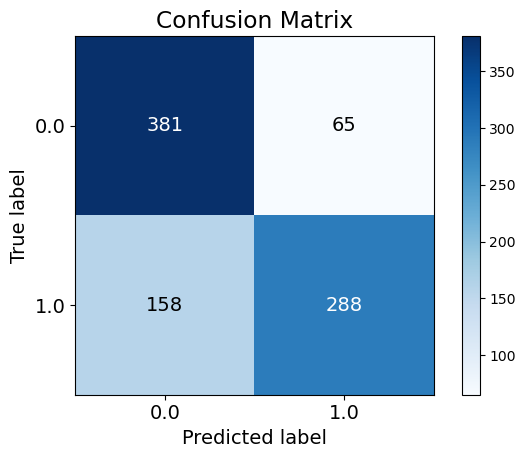

In [125]:
print("Classification Report for Train Set")
print("Accuracy Score {}".format(accuracy_score(y_train, best_grid_knn.predict(X_train).round (3))))
print(classification_report (y_train, best_grid_knn.predict(X_train)))
skplt.metrics.plot_confusion_matrix(y_train, best_grid_knn.predict(X_train));
save_fig('Train Set Confusion Matrix train for KNN hyper-para tuned q3')

## Hyperparameter Tuning on Decision Tree

In [127]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier


In [231]:
param_grid = {
    'criterion' : ['gini'],
    'max_depth' : range(2,8),
}

In [232]:
dt_grid = DecisionTreeClassifier()
grid_search_dt = GridSearchCV(estimator=dt_grid,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search_dt.fit(X_train,y_train)

Fitting 10 folds for each of 6 candidates, totalling 60 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': range(2, 8)},
             verbose=2)

In [233]:
best_grid_dt = grid_search_dt.best_estimator_
best_grid_dt

DecisionTreeClassifier(max_depth=7)

## Appying best estimators on Decision Tree

[[66 61]
 [28 54]]
Accuracy Score 0.5741626794258373
Classification report: 
              precision    recall  f1-score   support

         0.0       0.70      0.52      0.60       127
         1.0       0.47      0.66      0.55        82

    accuracy                           0.57       209
   macro avg       0.59      0.59      0.57       209
weighted avg       0.61      0.57      0.58       209



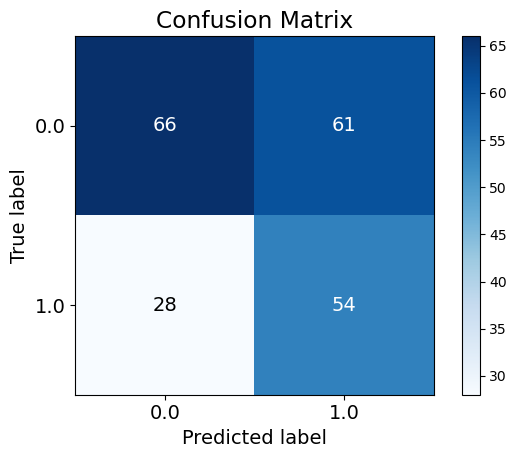

In [234]:
best_grid_dt.fit(X_train, y_train)
y_pred=best_grid_dt.predict(X_test)
print(confusion_matrix(y_test,y_pred))
skplt.metrics.plot_confusion_matrix(y_test, y_pred);
save_fig('Confusion Matrix for Descision_Tree hyper-para tuned q3')
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: \n{}".format(classification_report(y_test,y_pred)))

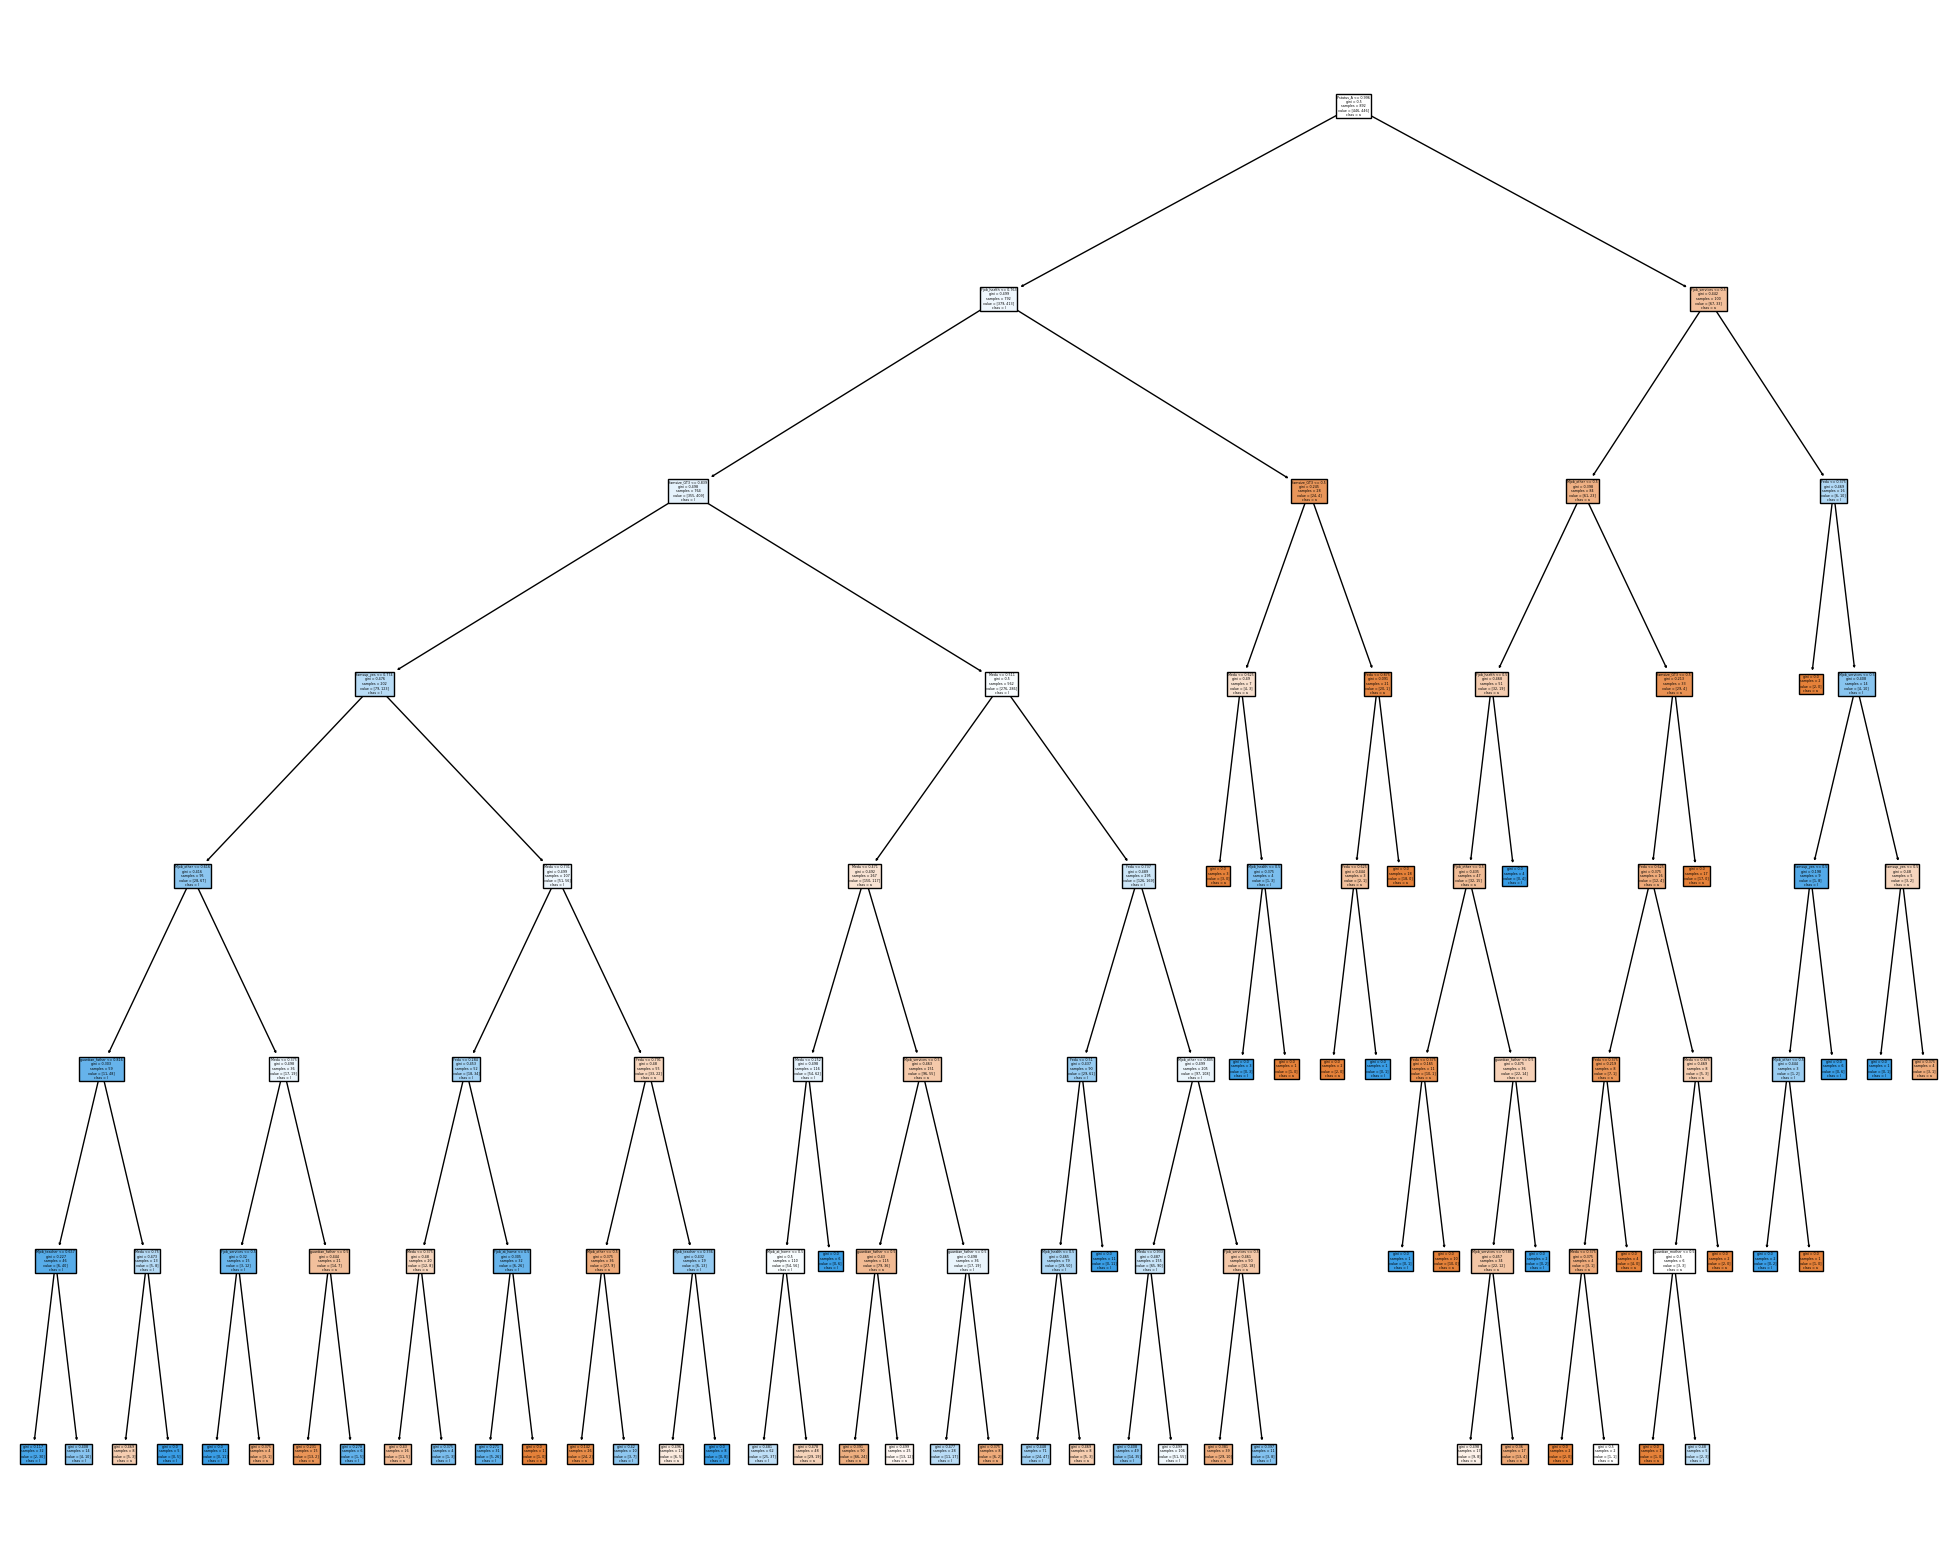

In [235]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(best_grid_dt, 
                   feature_names=X_train.columns.values.tolist(),  
                   class_names=y_train.name,
                   filled=True)

In [136]:
fig.savefig("decision_tree.png")

Max Depth =  1 , Train Acc. =  0.538 , Test Acc. =  0.383
Max Depth =  2 , Train Acc. =  0.565 , Test Acc. =  0.397
Max Depth =  3 , Train Acc. =  0.567 , Test Acc. =  0.397
Max Depth =  4 , Train Acc. =  0.612 , Test Acc. =  0.56
Max Depth =  5 , Train Acc. =  0.637 , Test Acc. =  0.545
Max Depth =  6 , Train Acc. =  0.679 , Test Acc. =  0.502
Max Depth =  7 , Train Acc. =  0.722 , Test Acc. =  0.579
Max Depth =  8 , Train Acc. =  0.769 , Test Acc. =  0.603
Max Depth =  9 , Train Acc. =  0.797 , Test Acc. =  0.641
Max Depth =  10 , Train Acc. =  0.834 , Test Acc. =  0.689
Max Depth =  11 , Train Acc. =  0.855 , Test Acc. =  0.703
Max Depth =  12 , Train Acc. =  0.872 , Test Acc. =  0.694
Max Depth =  13 , Train Acc. =  0.885 , Test Acc. =  0.713
Max Depth =  14 , Train Acc. =  0.895 , Test Acc. =  0.718
Max Depth =  15 , Train Acc. =  0.9 , Test Acc. =  0.718
Max Depth =  16 , Train Acc. =  0.905 , Test Acc. =  0.727
Max Depth =  17 , Train Acc. =  0.905 , Test Acc. =  0.727
Max Depth

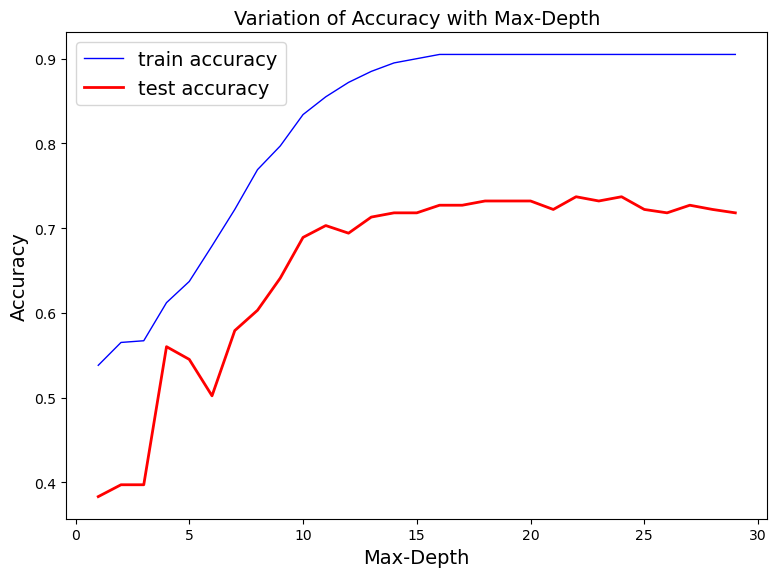

In [143]:
train_acc = []
test_acc = []
max_depth =[]

for depth in range(1, 30):
    clf = DecisionTreeClassifier(max_depth = depth)
    clf.fit(X_train, y_train)
    train_acc.append(accuracy_score(y_train, clf.predict(X_train)).round(3))
    test_acc.append(accuracy_score(y_test, clf.predict(X_test)).round(3))
    max_depth.append(depth)

for i in range(1, 30):
    print('Max Depth = ', i, ', Train Acc. = ', train_acc[i-1], ', Test Acc. = ' ,
         test_acc[i-1])

plt.figure(figsize = (8,6))
plt.xlabel('Max-Depth')
plt.ylabel('Accuracy')
plt.title('Variation of Accuracy with Max-Depth')
plt.plot(max_depth, train_acc, color = 'blue', linewidth = 1,
         label = 'train accuracy');

plt.plot(max_depth, test_acc, color = 'red', linewidth = 2,
         label = 'test accuracy')
plt.legend()
save_fig('Accuracy against max_depth')
plt.show();

In [144]:
# Confusion matrix for train set
print("Confusion Matrix for Train Set")
pd. DataFrame (confusion_matrix(y_train, best_grid_dt.predict(X_train)))


Confusion Matrix for Train Set


0    1
0  300  146
1  102  344

In [145]:
# Confusion matrix for test set
print("Confusion Matrix for Test Set")
pd. DataFrame (confusion_matrix(y_test, best_grid_dt.predict(X_test)))

Confusion Matrix for Test Set


0   1
0  65  62
1  27  55

In [146]:
print("Classification Report for Train Set")
print(classification_report (y_train, best_grid_dt.predict(X_train).round (3)))

Classification Report for Train Set
              precision    recall  f1-score   support

         0.0       0.75      0.67      0.71       446
         1.0       0.70      0.77      0.74       446

    accuracy                           0.72       892
   macro avg       0.72      0.72      0.72       892
weighted avg       0.72      0.72      0.72       892



In [147]:
print("Classification Report for Test Set")
print(classification_report(y_test, best_grid_dt.predict (X_test). round(3)))

Classification Report for Test Set
              precision    recall  f1-score   support

         0.0       0.71      0.51      0.59       127
         1.0       0.47      0.67      0.55        82

    accuracy                           0.57       209
   macro avg       0.59      0.59      0.57       209
weighted avg       0.61      0.57      0.58       209



## Hyperparameter Tuning on Random Forest

In [148]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


In [149]:
param_grid= {
    'n_estimators': [10, 50, 100, 500],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [None, 10, 30, 100],
    'max_features': [None, 'sqrt', 'log2']
}

param_grid= {
    'n_estimators': [10]
}

In [150]:
rf_grid = RandomForestClassifier()
grid_search_rf = GridSearchCV(estimator=rf_grid,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search_rf.fit(X_train,y_train)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits



480 fits failed out of a total of 1440.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
480 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 450, in fit
    trees = Parallel(
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/joblib/parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 10, 30, 100],
                         'max_features': [None, 'sqrt', 'log2'],
                         'n_estimators': [10, 50, 100, 500]},
             verbose=2)

In [151]:
# Finding out the best estimator
best_grid_rf = grid_search_rf.best_estimator_
best_grid_rf

RandomForestClassifier(max_depth=30, max_features=None, n_estimators=10)

## Applying best estimators in Random Forest

In [152]:
best_grid_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=30, max_features=None, n_estimators=10)

### Train

[[403  43]
 [ 45 401]]
Accuracy Score 0.9013452914798207
Classification report: 
              precision    recall  f1-score   support

         0.0       0.90      0.90      0.90       446
         1.0       0.90      0.90      0.90       446

    accuracy                           0.90       892
   macro avg       0.90      0.90      0.90       892
weighted avg       0.90      0.90      0.90       892



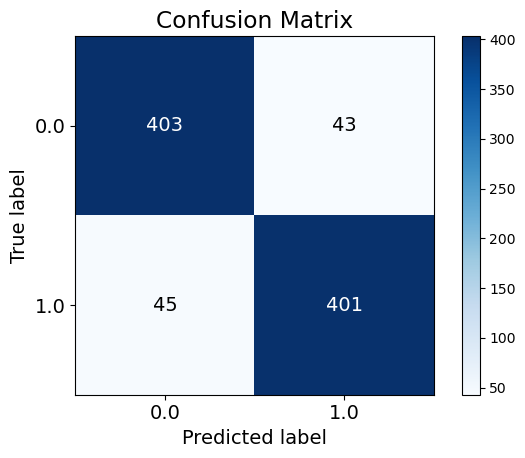

In [153]:
y_pred=best_grid_rf.predict(X_train)
print(confusion_matrix(y_train,y_pred))
skplt.metrics.plot_confusion_matrix(y_train, y_pred, cmap='Blues');
save_fig('Train Set Confusion Matrix for Random Forest hyper-para tuned q3')
print("Accuracy Score {}".format(accuracy_score(y_train,y_pred)))
print("Classification report: \n{}".format(classification_report(y_train,y_pred)))

### Test

In [154]:
y_pred = best_grid_rf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: \n{}".format(classification_report(y_test,y_pred)))

[[84 43]
 [17 65]]
Accuracy Score 0.7129186602870813
Classification report: 
              precision    recall  f1-score   support

         0.0       0.83      0.66      0.74       127
         1.0       0.60      0.79      0.68        82

    accuracy                           0.71       209
   macro avg       0.72      0.73      0.71       209
weighted avg       0.74      0.71      0.72       209



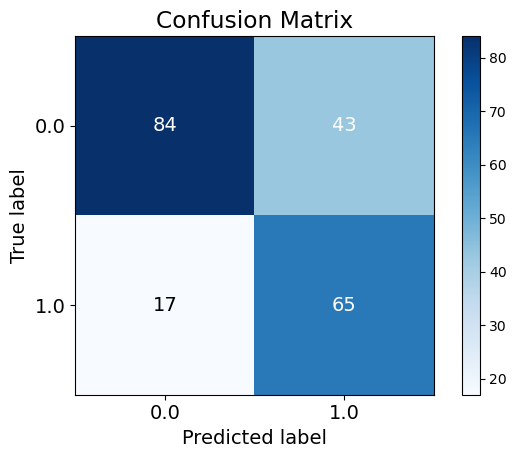

In [155]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred);
save_fig('Test Set Confusion Matrix for Random forest hyper-para tuned q3')

## Hyperparameter Tuning on Logistic Regression

In [156]:
from sklearn.linear_model import LogisticRegression

In [157]:
param_grid = {
    'penalty' : ['l1', 'l2', 'elasticnet', None],
    'random_state' : ['42', None],
    'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
}

In [158]:
lr_grid = LogisticRegression()
grid_search_lr = GridSearchCV(estimator=lr_grid,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search_lr.fit(X_train,y_train)

Fitting 10 folds for each of 48 candidates, totalling 480 fits



410 fits failed out of a total of 480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 447, in _check_solver
    raise ValueError(
ValueErr

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'penalty': ['l1', 'l2', 'elasticnet', None],
                         'random_state': ['42', None],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             verbose=2)

In [159]:
best_grid_lr = grid_search_lr.best_estimator_
best_grid_lr

LogisticRegression(solver='sag')

In [160]:
# Applying the best grid for logistic regression
best_grid_lr.fit(X_train, y_train)

LogisticRegression(solver='sag')

### Train Set

[[261 185]
 [164 282]]
Accuracy Score 0.6087443946188341
Classification report: 
              precision    recall  f1-score   support

         0.0       0.61      0.59      0.60       446
         1.0       0.60      0.63      0.62       446

    accuracy                           0.61       892
   macro avg       0.61      0.61      0.61       892
weighted avg       0.61      0.61      0.61       892



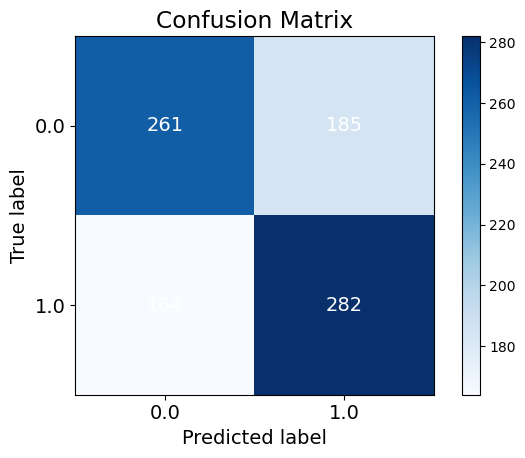

In [161]:
y_pred=best_grid_lr.predict(X_train)
print(confusion_matrix(y_train,y_pred))
skplt.metrics.plot_confusion_matrix(y_train, y_pred);
save_fig('Train Set Confusion Matrix for Logistic Regression hyper-para tuned q3')
print("Accuracy Score {}".format(accuracy_score(y_train,y_pred)))
print("Classification report: \n{}".format(classification_report(y_train,y_pred)))

### Test Set

[[78 49]
 [31 51]]
Accuracy Score 0.6172248803827751
Classification report: 
              precision    recall  f1-score   support

         0.0       0.72      0.61      0.66       127
         1.0       0.51      0.62      0.56        82

    accuracy                           0.62       209
   macro avg       0.61      0.62      0.61       209
weighted avg       0.63      0.62      0.62       209



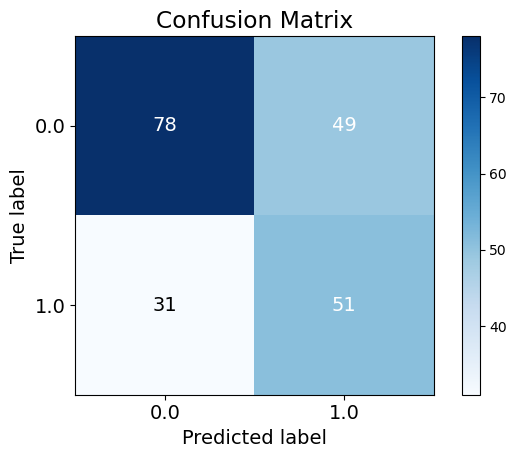

In [162]:
y_pred=best_grid_lr.predict(X_test)
print(confusion_matrix(y_test,y_pred))
skplt.metrics.plot_confusion_matrix(y_test, y_pred);
save_fig('Test Set Confusion Matrix for Logistic Regression hyper-para tuned q3')
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: \n{}".format(classification_report(y_test,y_pred)))

## Hyperparameter Tuning on SVM

In [163]:
from sklearn.svm import SVC

In [164]:
param_grid = {
    'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
    'random_state' : [42, None],
    'gamma' : ['scale', 'auto'],
    'shrinking' : [True, False],
    'probability' : [True, False],
    'decision_function_shape' : ['ovo', 'ovr'],
    'break_ties' : [True, False]
}

In [165]:
svc_grid = SVC()
grid_search_svc = GridSearchCV(estimator=svc_grid,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search_svc.fit(X_train,y_train)

Fitting 10 folds for each of 256 candidates, totalling 2560 fits


/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/svm/_base.py", line 780, in predict
    raise ValueError

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/svm/_base.py", line 780, in predict
    raise ValueError

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/svm/_base.py", line 780, in predict
    raise ValueError

    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt

    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/svm/_base.py", line 780, in predict
    raise ValueError

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/svm/_base.py", line 780, in predict
    raise ValueError

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/svm/_base.py", line 780, in predict
    raise ValueError

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/svm/_base.py", line 780, in predict
    raise ValueError

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/svm/_base.py", line 780, in predict
    raise ValueError

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/svm/_base.py", line 780, in predict
    raise ValueError

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/svm/_base.py", line 780, in predict
    raise ValueError

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/svm/_base.py", line 780, in predict
    raise ValueError

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/svm/_base.py", line 780, in predict
    raise ValueError

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/svm/_base.py", line 780, in predict
    raise ValueError

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/svm/_base.py", line 780, in predict
    raise ValueError

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/svm/_base.py", line 780, in predict
    raise ValueError

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/svm/_base.py", line 780, in predict
    raise ValueError

    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/svm/_base.py", line 780, in predict
    raise ValueError

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/svm/_base.py", line 780, in predict
    raise ValueError

    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/svm/_base.py", line 780, in predict
    raise ValueError

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/svm/_base.py", line 780, in predict
    raise ValueError

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/svm/_base.py", line 780, in predict
    raise ValueError

    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/svm/_base.py", line 780, in predict
    raise ValueError

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/svm/_base.py", line 780, in predict
    raise ValueError

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/svm/_base.py", line 780, in predict
    raise ValueError

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/svm/_base.py", line 780, in predict
    raise ValueError

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/svm/_base.py", line 780, in predict
    raise ValueError

  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/svm/_base.py", line 780, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py",

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/svm/_base.py", line 780, in predict
    raise ValueError

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/svm/_base.py", line 780, in predict
    raise ValueError

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/svm/_base.py", line 780, in predict
    raise ValueError

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/svm/_base.py", line 780, in predict
    raise ValueError

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/svm/_base.py", line 780, in predict
    raise ValueError

  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/svm/_base.py", line 780, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py",

  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/svm/_base.py", line 780, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py",

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/svm/_base.py", line 780, in predict
    raise ValueError

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/svm/_base.py", line 780, in predict
    raise ValueError

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/svm/_base.py", line 780, in predict
    raise ValueError

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/svm/_base.py", line 780, in predict
    raise ValueError

/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/svm/_base.py", line 780, in predict
    raise ValueError

  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/svm/_base.py", line 780, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py",

  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/svm/_base.py", line 780, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/met

[CV] END .........criterion=gini, max_depth=2, splitter=best; total time=   0.0s
[CV] END .......criterion=gini, max_depth=2, splitter=random; total time=   0.0s
[CV] END .......criterion=gini, max_depth=2, splitter=random; total time=   0.0s
[CV] END .........criterion=gini, max_depth=3, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=3, splitter=best; total time=   0.0s
[CV] END .......criterion=gini, max_depth=3, splitter=random; total time=   0.0s
[CV] END .......criterion=gini, max_depth=3, splitter=random; total time=   0.0s
[CV] END ......criterion=entropy, max_depth=2, splitter=best; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=3; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=4; total time=   0.0s
[CV] END ...................

[CV] END .........criterion=gini, max_depth=2, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=2, splitter=best; total time=   0.0s
[CV] END .......criterion=gini, max_depth=2, splitter=random; total time=   0.0s
[CV] END .........criterion=gini, max_depth=3, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=3, splitter=best; total time=   0.0s
[CV] END .......criterion=gini, max_depth=3, splitter=random; total time=   0.0s
[CV] END .......criterion=gini, max_depth=3, splitter=random; total time=   0.0s
[CV] END ......criterion=entropy, max_depth=2, splitter=best; total time=   0.0s
[CV] END ......criterion=entropy, max_depth=2, splitter=best; total time=   0.0s
[CV] END ......criterion=entropy, max_depth=2, splitter=best; total time=   0.0s
[CV] END ......criterion=entropy, max_depth=2, splitter=best; total time=   0.0s
[CV] END ......criterion=entropy, max_depth=3, splitter=best; total time=   0.0s
[CV] END ......criterion=ent

[CV] END .........criterion=gini, max_depth=2, splitter=best; total time=   0.0s
[CV] END ......criterion=entropy, max_depth=2, splitter=best; total time=   0.0s
[CV] END ....criterion=entropy, max_depth=2, splitter=random; total time=   0.0s
[CV] END ....criterion=entropy, max_depth=2, splitter=random; total time=   0.0s
[CV] END ....criterion=entropy, max_depth=3, splitter=random; total time=   0.0s
[CV] END ....criterion=entropy, max_depth=3, splitter=random; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=3; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=3; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=7; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=None, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=None, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=None, n_estimators=50; to

[CV] END .........criterion=gini, max_depth=2, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=2, splitter=best; total time=   0.0s
[CV] END .......criterion=gini, max_depth=2, splitter=random; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=3; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=3; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=3; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=6; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=6; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=7; total time=   0.0s
[CV] END criterion=gini, max

[CV] END .........criterion=gini, max_depth=2, splitter=best; total time=   0.0s
[CV] END .......criterion=gini, max_depth=2, splitter=random; total time=   0.0s
[CV] END .........criterion=gini, max_depth=3, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=3, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=3, splitter=best; total time=   0.0s
[CV] END .......criterion=gini, max_depth=3, splitter=random; total time=   0.0s
[CV] END .......criterion=gini, max_depth=3, splitter=random; total time=   0.0s
[CV] END .......criterion=gini, max_depth=3, splitter=random; total time=   0.0s
[CV] END ......criterion=entropy, max_depth=2, splitter=best; total time=   0.0s
[CV] END ......criterion=entropy, max_depth=2, splitter=best; total time=   0.0s
[CV] END ....criterion=entropy, max_depth=2, splitter=random; total time=   0.0s
[CV] END ....criterion=entropy, max_depth=2, splitter=random; total time=   0.0s
[CV] END ......criterion=ent

One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan 0.56515605 0.56515605
 0.56515605 0.56515605 0.56515605 0.56515605 0.56515605 0.56515605
 0.60990012 0.60990012 0.60990012 0.60990012 0.60990012 0.60990012
 0.60990012 0.60990012 0.59314607 0.59314607 0.59314607 0.59314607
 0.59314607 0.5

GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'break_ties': [True, False],
                         'decision_function_shape': ['ovo', 'ovr'],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                         'probability': [True, False],
                         'random_state': [42, None],
                         'shrinking': [True, False]},
             verbose=2)

In [166]:
best_grid_svc = grid_search_svc.best_estimator_
best_grid_svc

SVC(break_ties=True, kernel='poly', probability=True, random_state=42)

In [167]:
# Applying the best grid for SVC
best_grid_svc.fit(X_train, y_train)

SVC(break_ties=True, kernel='poly', probability=True, random_state=42)

### Train Set

[[318 128]
 [135 311]]
Accuracy Score 0.7051569506726457
Classification report: 
              precision    recall  f1-score   support

         0.0       0.70      0.71      0.71       446
         1.0       0.71      0.70      0.70       446

    accuracy                           0.71       892
   macro avg       0.71      0.71      0.71       892
weighted avg       0.71      0.71      0.71       892



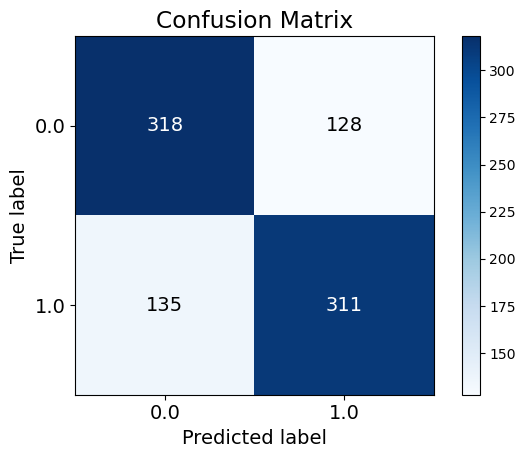

In [168]:
y_pred=best_grid_svc.predict(X_train)
print(confusion_matrix(y_train,y_pred))
skplt.metrics.plot_confusion_matrix(y_train, y_pred);
save_fig('Train Set Confusion Matrix for SVM hyper-para tuned q3')
print("Accuracy Score {}".format(accuracy_score(y_train,y_pred)))
print("Classification report: \n{}".format(classification_report(y_train,y_pred)))

### Test Set

[[74 53]
 [33 49]]
Accuracy Score 0.5885167464114832
Classification report: 
              precision    recall  f1-score   support

         0.0       0.69      0.58      0.63       127
         1.0       0.48      0.60      0.53        82

    accuracy                           0.59       209
   macro avg       0.59      0.59      0.58       209
weighted avg       0.61      0.59      0.59       209



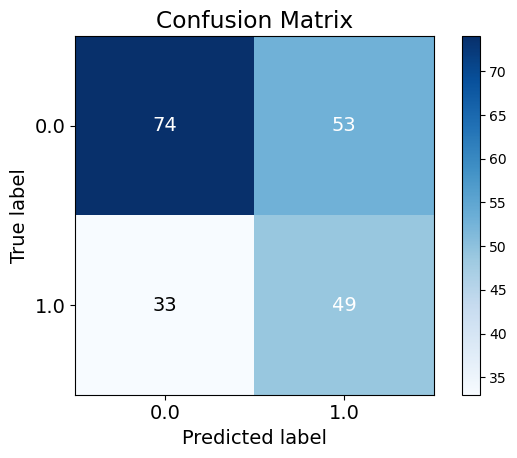

In [169]:

y_pred=best_grid_svc.predict(X_test)
print(confusion_matrix(y_test,y_pred))
skplt.metrics.plot_confusion_matrix(y_test, y_pred);
save_fig('Test Set Confusion Matrix for SVC hyper-para tuned q3')
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: \n{}".format(classification_report(y_test,y_pred)))

## Hyperparameter Tuning on Multinomial Naive Bayes

In [170]:
from  sklearn.naive_bayes import MultinomialNB

In [171]:
param_grid = {
    'alpha': [0.01, 0.1, 0.5, 1.0, 10.0, ],
    'fit_prior': [True, False]
}

In [172]:
nb_grid = MultinomialNB()
grid_search_nb = GridSearchCV(estimator=nb_grid,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search_nb.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


GridSearchCV(cv=10, estimator=MultinomialNB(), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 0.5, 1.0, 10.0],
                         'fit_prior': [True, False]},
             verbose=2)

In [173]:
best_grid_nb = grid_search_nb.best_estimator_
best_grid_nb

MultinomialNB(fit_prior=False)

In [174]:
# Applying the best grid for Multinomial Naive Bayes
best_grid_nb.fit(X_train, y_train)

MultinomialNB(fit_prior=False)

### Train Set

[[254 192]
 [190 256]]
Accuracy Score 0.5717488789237668
Classification report: 
              precision    recall  f1-score   support

         0.0       0.57      0.57      0.57       446
         1.0       0.57      0.57      0.57       446

    accuracy                           0.57       892
   macro avg       0.57      0.57      0.57       892
weighted avg       0.57      0.57      0.57       892



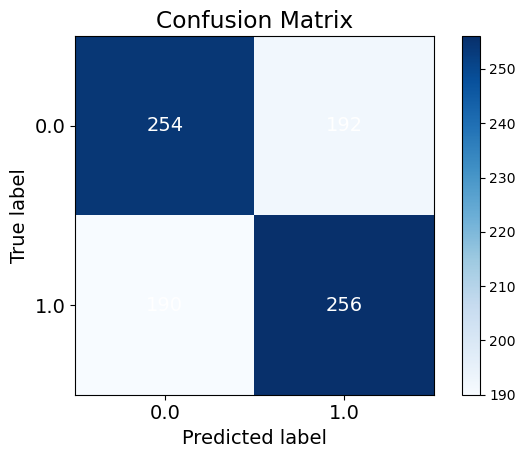

In [175]:
y_pred=best_grid_nb.predict(X_train)
print(confusion_matrix(y_train,y_pred))
skplt.metrics.plot_confusion_matrix(y_train, y_pred);
save_fig('Train Set Confusion Matrix for Multinomial NB hyper-para tuned q3')
print("Accuracy Score {}".format(accuracy_score(y_train,y_pred)))
print("Classification report: \n{}".format(classification_report(y_train,y_pred)))

### Test Set

[[67 60]
 [39 43]]
Accuracy Score 0.5263157894736842
Classification report: 
              precision    recall  f1-score   support

         0.0       0.63      0.53      0.58       127
         1.0       0.42      0.52      0.46        82

    accuracy                           0.53       209
   macro avg       0.52      0.53      0.52       209
weighted avg       0.55      0.53      0.53       209



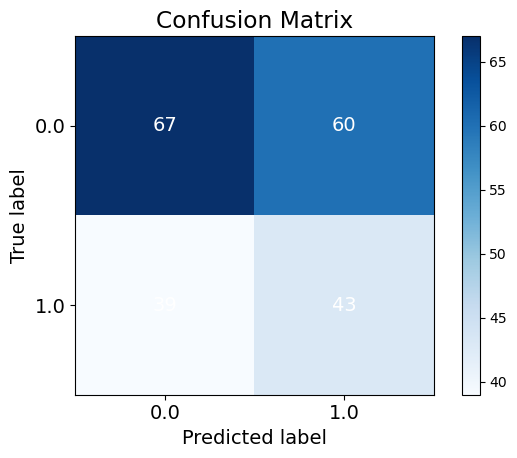

In [176]:
y_pred=best_grid_nb.predict(X_test)
print(confusion_matrix(y_test,y_pred))
skplt.metrics.plot_confusion_matrix(y_test, y_pred);
save_fig('Test Set Confusion Matrix for MultinomialNB hyper-para tuned q3')
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: \n{}".format(classification_report(y_test,y_pred)))

## Ensemble Learning

In [177]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

## Hard Voting classifier

In [178]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [179]:
#log_clf = LogisticRegression(random_state=42)
#rnd_clf = RandomForestClassifier(random_state=42)
#svm_clf = SVC(random_state=42)
hard_voting_clf = VotingClassifier(
    estimators=[
        ('knn', best_grid_knn),
        ('dt', best_grid_dt),
        ('lr', best_grid_lr),
        ('rf', best_grid_rf),
        ('svc', best_grid_svc),
        ('nb', best_grid_nb)
    ], 
    voting = 'hard'
)
hard_voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('knn', KNeighborsClassifier(n_neighbors=6)),
                             ('dt', DecisionTreeClassifier(max_depth=7)),
                             ('lr', LogisticRegression(solver='sag')),
                             ('rf',
                              RandomForestClassifier(max_depth=30,
                                                     max_features=None,
                                                     n_estimators=10)),
                             ('svc',
                              SVC(break_ties=True, kernel='poly',
                                  probability=True, random_state=42)),
                             ('nb', MultinomialNB(fit_prior=False))])

In [180]:
from sklearn.metrics import accuracy_score
for clf in [best_grid_knn, best_grid_dt, best_grid_lr, best_grid_rf, best_grid_svc, best_grid_nb, hard_voting_clf]:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.


KNeighborsClassifier 0.6650717703349283
DecisionTreeClassifier 0.569377990430622
LogisticRegression 0.6172248803827751
RandomForestClassifier 0.7416267942583732
SVC 0.5885167464114832
MultinomialNB 0.5263157894736842
VotingClassifier 0.6650717703349283


Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.


### Train Set

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.


Accuracy Score 0.7410313901345291
Classification report: 
              precision    recall  f1-score   support

         0.0       0.71      0.82      0.76       446
         1.0       0.78      0.67      0.72       446

    accuracy                           0.74       892
   macro avg       0.75      0.74      0.74       892
weighted avg       0.75      0.74      0.74       892



Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.


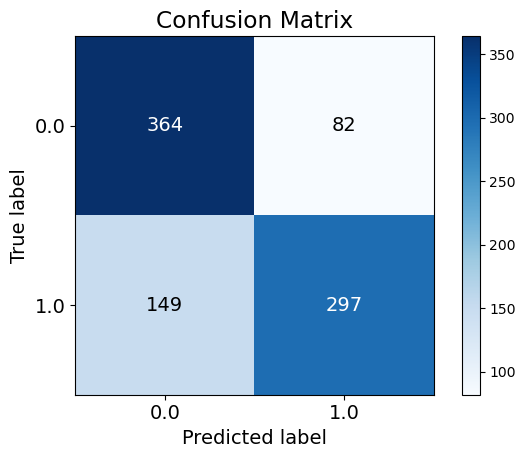

In [181]:
skplt.metrics.plot_confusion_matrix(y_train, hard_voting_clf.predict(X_train));
save_fig('Train Set Confusion Matrix for Ensemble Hard Voting q3')
print("Accuracy Score {}".format(accuracy_score(y_train, hard_voting_clf.predict(X_train))))
print("Classification report: \n{}".format(classification_report(y_train, hard_voting_clf.predict(X_train))))

### Test Set

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.


Accuracy Score 0.6650717703349283
Classification report: 
              precision    recall  f1-score   support

         0.0       0.73      0.71      0.72       127
         1.0       0.57      0.60      0.58        82

    accuracy                           0.67       209
   macro avg       0.65      0.65      0.65       209
weighted avg       0.67      0.67      0.67       209



Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.


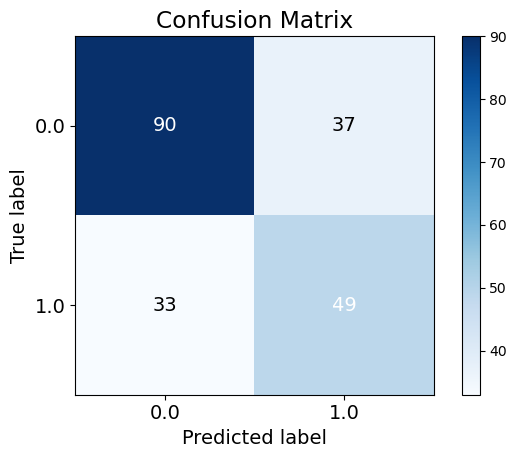

In [182]:
skplt.metrics.plot_confusion_matrix(y_test, hard_voting_clf.predict(X_test));
save_fig('Test Set Confusion Matrix for Ensemble Hard Voting q3')
print("Accuracy Score {}".format(accuracy_score(y_test, hard_voting_clf.predict(X_test))))
print("Classification report: \n{}".format(classification_report(y_test, hard_voting_clf.predict(X_test))))

## Soft voting classifier

In [183]:
soft_voting_clf = VotingClassifier(
    estimators=[
        ('knn', best_grid_knn),
        ('dt', best_grid_dt),
        ('lr', best_grid_lr),
        ('rf', best_grid_rf),
        ('svc', best_grid_svc),
        ('nb', best_grid_nb)
    ], 
    voting = 'soft'
)
soft_voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('knn', KNeighborsClassifier(n_neighbors=6)),
                             ('dt', DecisionTreeClassifier(max_depth=7)),
                             ('lr', LogisticRegression(solver='sag')),
                             ('rf',
                              RandomForestClassifier(max_depth=30,
                                                     max_features=None,
                                                     n_estimators=10)),
                             ('svc',
                              SVC(break_ties=True, kernel='poly',
                                  probability=True, random_state=42)),
                             ('nb', MultinomialNB(fit_prior=False))],
                 voting='soft')

In [184]:
from sklearn.metrics import accuracy_score
for clf in [best_grid_knn, best_grid_dt, best_grid_lr, best_grid_rf, best_grid_svc, best_grid_nb, soft_voting_clf]:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.


KNeighborsClassifier 0.6650717703349283
DecisionTreeClassifier 0.5741626794258373
LogisticRegression 0.6172248803827751
RandomForestClassifier 0.6889952153110048
SVC 0.5885167464114832
MultinomialNB 0.5263157894736842
VotingClassifier 0.6985645933014354


### Train Set

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.


Accuracy Score 0.7410313901345291
Classification report: 
              precision    recall  f1-score   support

         0.0       0.71      0.82      0.76       446
         1.0       0.78      0.67      0.72       446

    accuracy                           0.74       892
   macro avg       0.75      0.74      0.74       892
weighted avg       0.75      0.74      0.74       892



Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.


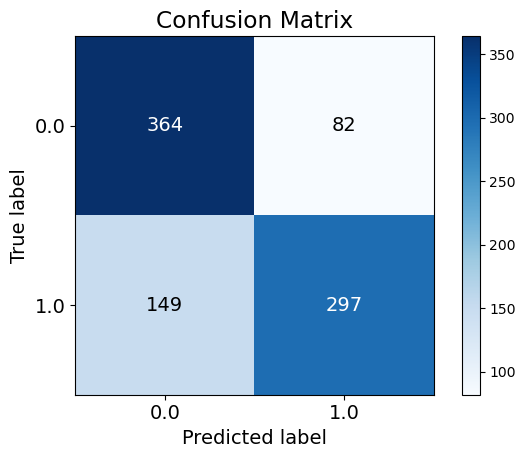

In [185]:
skplt.metrics.plot_confusion_matrix(y_train, hard_voting_clf.predict(X_train));
save_fig('Train Set Confusion Matrix for Ensemble Soft Voting q3')
print("Accuracy Score {}".format(accuracy_score(y_train, hard_voting_clf.predict(X_train))))
print("Classification report: \n{}".format(classification_report(y_train, hard_voting_clf.predict(X_train))))

### Test Set

Accuracy Score 0.6985645933014354
Classification report: 
              precision    recall  f1-score   support

         0.0       0.80      0.67      0.73       127
         1.0       0.59      0.74      0.66        82

    accuracy                           0.70       209
   macro avg       0.70      0.71      0.69       209
weighted avg       0.72      0.70      0.70       209



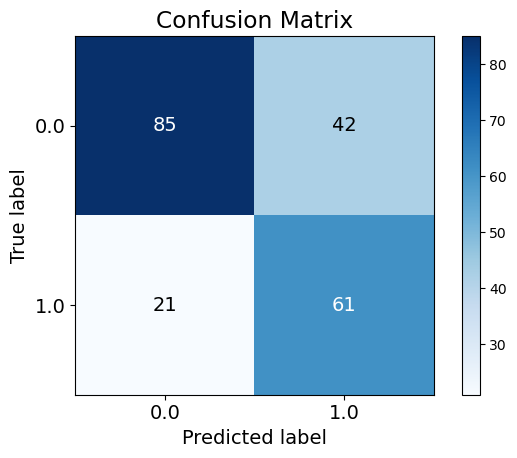

In [186]:
skplt.metrics.plot_confusion_matrix(y_test, soft_voting_clf.predict(X_test));
save_fig('Test Set Confusion Matrix for Ensemble Soft Voting q3')
print("Accuracy Score {}".format(accuracy_score(y_test, soft_voting_clf.predict(X_test))))
print("Classification report: \n{}".format(classification_report(y_test, soft_voting_clf.predict(X_test))))

## bagging and pasting

In [187]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500,
                            max_samples=100, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)


BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=100,
                  n_estimators=500, n_jobs=-1, random_state=42)

## out of bag evaluation

In [188]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500,
                            oob_score=True, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)
print('OOB Score', bag_clf.oob_score_)

y_pred = bag_clf.predict(X_test)
print('Test Accuracy', accuracy_score(y_test, y_pred))
print('Train Accuracy', accuracy_score(y_train, bag_clf.predict(X_train)))

OOB Score 0.7634529147982063
Test Accuracy 0.7416267942583732
Train Accuracy 0.9047085201793722


Accuracy Score 0.7416267942583732
Classification report: 
              precision    recall  f1-score   support

         0.0       0.83      0.72      0.77       127
         1.0       0.64      0.78      0.70        82

    accuracy                           0.74       209
   macro avg       0.74      0.75      0.74       209
weighted avg       0.76      0.74      0.74       209



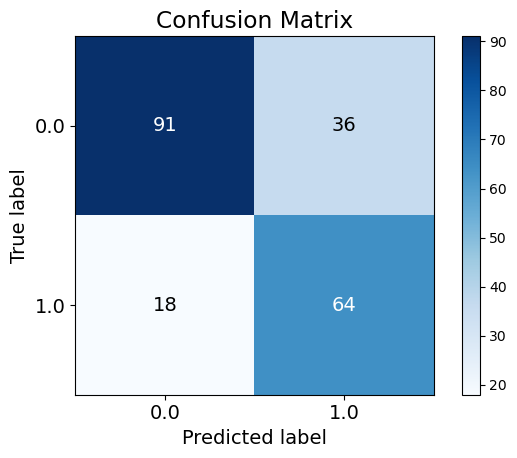

In [189]:
skplt.metrics.plot_confusion_matrix(y_test, bag_clf.predict(X_test));
save_fig('Confusion Matrix for Out of bag q3')
print("Accuracy Score {}".format(accuracy_score(y_test, bag_clf.predict(X_test))))
print("Classification report: \n{}".format(classification_report(y_test, bag_clf.predict(X_test))))

Accuracy Score 0.9047085201793722
Classification report: 
              precision    recall  f1-score   support

         0.0       0.90      0.91      0.90       446
         1.0       0.91      0.90      0.90       446

    accuracy                           0.90       892
   macro avg       0.90      0.90      0.90       892
weighted avg       0.90      0.90      0.90       892



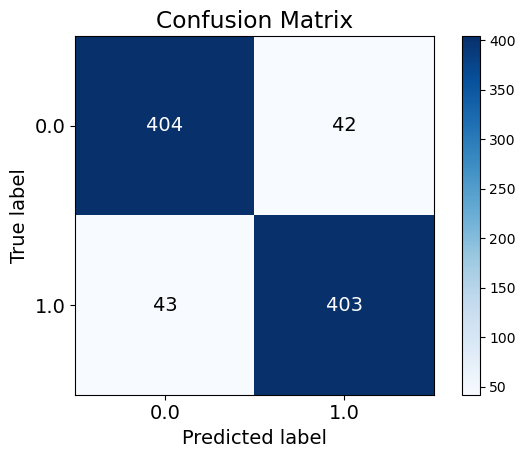

In [190]:
skplt.metrics.plot_confusion_matrix(y_train, bag_clf.predict(X_train));
save_fig('Confusion Matrix train for Out of bag q3')
print("Accuracy Score {}".format(accuracy_score(y_train, bag_clf.predict(X_train))))
print("Classification report: \n{}".format(classification_report(y_train, bag_clf.predict(X_train))))

## impact of no. of estimators

In [191]:
import numpy as np
est = range(50, 500, 50)
train_acc = []
test_acc = []
oob_acc = []
estim = []
out = []
for num_est in est:
    estim.append(num_est)
    rnd_clf = RandomForestClassifier(n_estimators=num_est, oob_score = True, 
                                     max_leaf_nodes=16, n_jobs=-1, 
                                     random_state=42)
    rnd_clf.fit(X_train, y_train)
    y_pred_rf = rnd_clf.predict(X_test)
    train_acc.append(
        accuracy_score(y_train, rnd_clf.predict(X_train)))
    test_acc.append(
        accuracy_score(y_test, rnd_clf.predict(X_test)))
    oob_acc.append(rnd_clf.oob_score_)
i = 0
while i < len(estim):
    print('Num of estimators: ', estim[i], ' train acc = ', train_acc[i],
         ' test acc = ', test_acc[i], 'oob = ', oob_acc[i])
    i = i + 1

Num of estimators:  50  train acc =  0.7286995515695067  test acc =  0.5980861244019139 oob =  0.6266816143497758
Num of estimators:  100  train acc =  0.7253363228699552  test acc =  0.5980861244019139 oob =  0.6356502242152466
Num of estimators:  150  train acc =  0.726457399103139  test acc =  0.5933014354066986 oob =  0.6266816143497758
Num of estimators:  200  train acc =  0.7320627802690582  test acc =  0.5933014354066986 oob =  0.624439461883408
Num of estimators:  250  train acc =  0.7320627802690582  test acc =  0.5980861244019139 oob =  0.6278026905829597
Num of estimators:  300  train acc =  0.7320627802690582  test acc =  0.5980861244019139 oob =  0.6199551569506726
Num of estimators:  350  train acc =  0.726457399103139  test acc =  0.5980861244019139 oob =  0.6199551569506726
Num of estimators:  400  train acc =  0.7230941704035875  test acc =  0.5980861244019139 oob =  0.6165919282511211
Num of estimators:  450  train acc =  0.7242152466367713  test acc =  0.602870813397

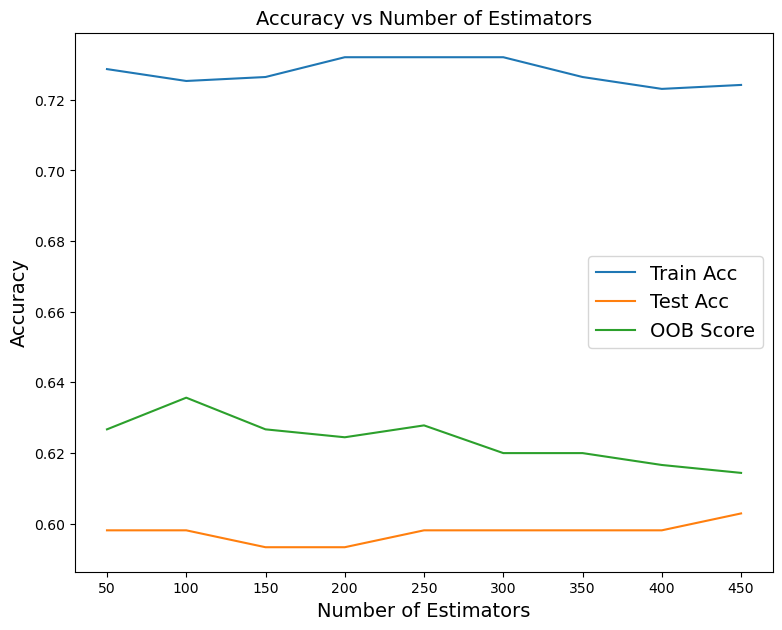

In [192]:
plt.figure(figsize = (9,7))
plt.plot(estim, train_acc, label = 'Train Acc')
plt.plot(estim, test_acc, label = 'Test Acc')
plt.plot(estim, oob_acc, label = 'OOB Score')
plt.legend()
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Estimators')
plt.show()

## ADA boost classifier

In [193]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=100,
    learning_rate=0.5, random_state=42)
ada_clf.fit(X_train, y_train)
y_pred = ada_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.6220095693779905

### Train Set

Accuracy Score 0.6154708520179372
Classification report: 
              precision    recall  f1-score   support

         0.0       0.63      0.56      0.59       446
         1.0       0.60      0.67      0.64       446

    accuracy                           0.62       892
   macro avg       0.62      0.62      0.61       892
weighted avg       0.62      0.62      0.61       892



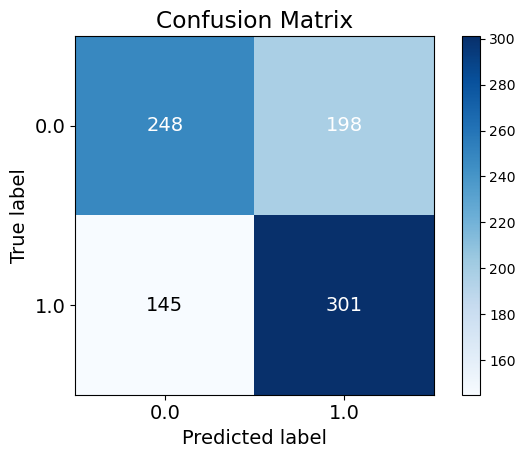

In [194]:
skplt.metrics.plot_confusion_matrix(y_train, ada_clf.predict(X_train));
save_fig('Train Set Confusion Matrix for AdaBoost q3')
print("Accuracy Score {}".format(accuracy_score(y_train, ada_clf.predict(X_train))))
print("Classification report: \n{}".format(classification_report(y_train, ada_clf.predict(X_train))))

In [195]:
### Test Set

Accuracy Score 0.6220095693779905
Classification report: 
              precision    recall  f1-score   support

         0.0       0.71      0.63      0.67       127
         1.0       0.52      0.61      0.56        82

    accuracy                           0.62       209
   macro avg       0.61      0.62      0.61       209
weighted avg       0.64      0.62      0.63       209



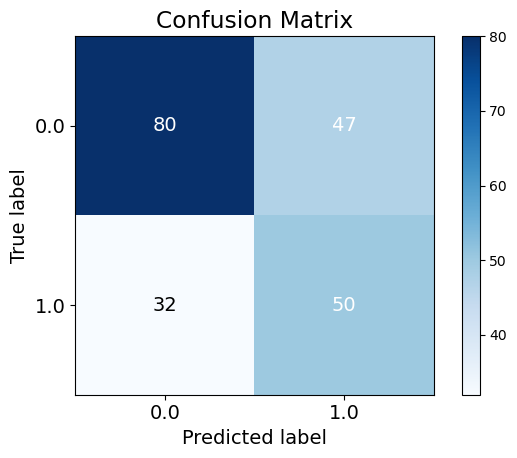

In [196]:
skplt.metrics.plot_confusion_matrix(y_test, ada_clf.predict(X_test));
save_fig('Test Set Confusion Matrix for AdaBoost q3')
print("Accuracy Score {}".format(accuracy_score(y_test, ada_clf.predict(X_test))))
print("Classification report: \n{}".format(classification_report(y_test, ada_clf.predict(X_test))))

In [197]:
import numpy as np
est = np.linspace(1, 500, 2)
train_acc = []
test_acc = []
num_learners = []
for estimators in est:
    ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=int(estimators),
    learning_rate=0.5, random_state=42)
    ada_clf.fit(X_train, y_train)
    y_pred_test = ada_clf.predict(X_test)
    y_pred_train = ada_clf.predict(X_train)
    train_acc.append(accuracy_score(y_train, y_pred_train))
    test_acc.append(accuracy_score(y_test, y_pred_test))
    num_learners.append(estimators)

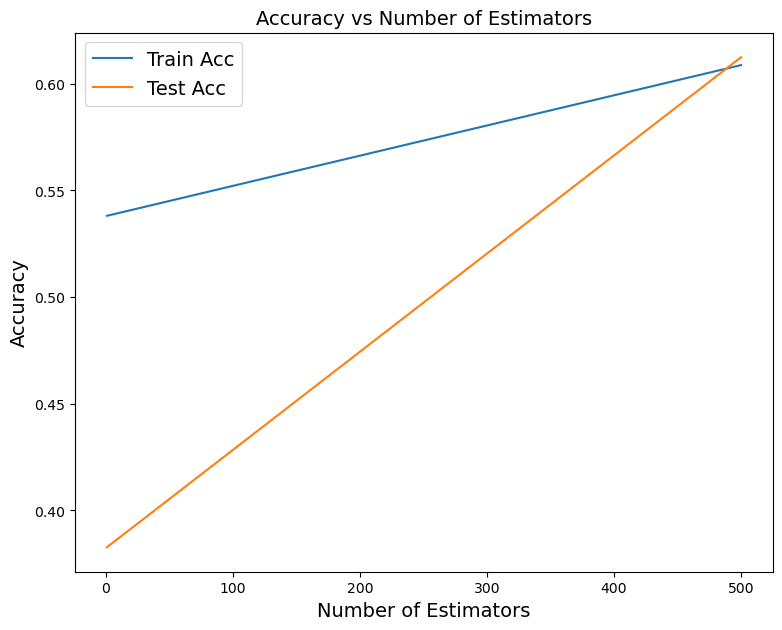

In [198]:
plt.figure(figsize = (9,7))
plt.plot(num_learners, train_acc, label = 'Train Acc')
plt.plot(num_learners, test_acc, label = 'Test Acc')
plt.legend()
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Estimators')
plt.show()

## XGBoost

In [199]:
import xgboost as xgb

In [200]:
xgb_cl = xgb.XGBClassifier()

# Fit
xgb_cl.fit(X_train, y_train)

# Predict
preds = xgb_cl.predict(X_test)

# Score
accuracy_score(y_test, preds)

0.7129186602870813

### Train Set

Accuracy Score 0.8957399103139013
Classification report: 
              precision    recall  f1-score   support

         0.0       0.89      0.91      0.90       446
         1.0       0.90      0.89      0.89       446

    accuracy                           0.90       892
   macro avg       0.90      0.90      0.90       892
weighted avg       0.90      0.90      0.90       892



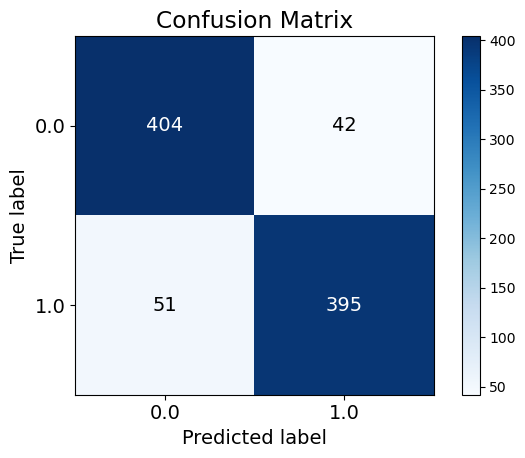

In [201]:
skplt.metrics.plot_confusion_matrix(y_train, xgb_cl.predict(X_train));
save_fig('Train Set Confusion Matrix for XGBoost q3')
print("Accuracy Score {}".format(accuracy_score(y_train, xgb_cl.predict(X_train))))
print("Classification report: \n{}".format(classification_report(y_train, xgb_cl.predict(X_train))))

### Test Set

Accuracy Score 0.7129186602870813
Classification report: 
              precision    recall  f1-score   support

         0.0       0.80      0.70      0.75       127
         1.0       0.61      0.73      0.67        82

    accuracy                           0.71       209
   macro avg       0.71      0.72      0.71       209
weighted avg       0.73      0.71      0.72       209



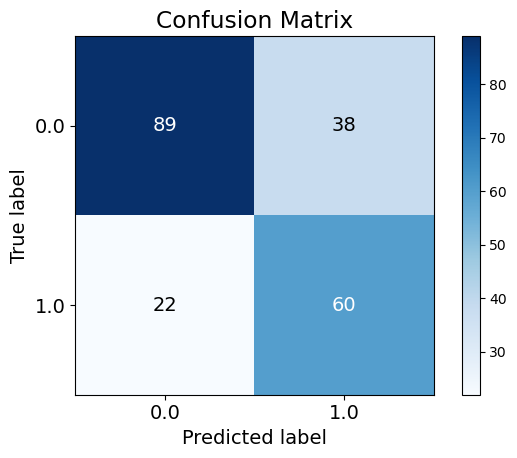

In [202]:
skplt.metrics.plot_confusion_matrix(y_test, xgb_cl.predict(X_test));
save_fig('Test Set Confusion Matrix for XGBoost q3')
print("Accuracy Score {}".format(accuracy_score(y_test, xgb_cl.predict(X_test))))
print("Classification report: \n{}".format(classification_report(y_test, xgb_cl.predict(X_test))))

## XAI using LIME

In [203]:
#conda install -c conda-forge ds-lime

In [204]:
from lime.lime_tabular import LimeTabularExplainer

In [205]:
feature_names = X_train.columns.tolist()
#X_train.columns.values.tolist()

In [242]:
# Create a LimeTabularExplainer object
explainer = LimeTabularExplainer(X_train.values, feature_names=feature_names, class_names=['low', 'high'])


In [243]:
# Select a specific instance from the testing set for explanation
instance_idx = 0
instance = X_test.values[instance_idx]
true_label = y_test[instance_idx]

In [244]:
# Generate explanations using LIME
#Since our accuracy is the highest for Out of Bag, we will be using OOB to interpret
explanation_lime = explainer.explain_instance(instance, best_grid_rf.predict_proba, num_features=len(feature_names))


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


In [245]:
# Print the true label and predicted probabilities
print("True Label:", true_label)
print("Predicted Probabilities:", best_grid_rf.predict_proba([instance]))



True Label: 1.0
Predicted Probabilities: [[0.27075758 0.72924242]]


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


In [246]:
# Print the top features and their weights in the LIME explanation
print("LIME Explanation:")
for feature, weight in explanation_lime.as_list():
    print(feature, weight)

LIME Explanation:
Fjob_health <= 0.00 0.20827014087746493
Pstatus_A <= 0.00 0.08295656809472085
Fjob_at_home <= 0.00 0.08028687046294847
Fjob_teacher <= 0.00 0.0642954473743081
Medu <= 0.50 -0.05054214939755675
0.00 < famsup_yes <= 1.00 -0.04744302883079485
famsize_GT3 <= 0.00 0.04621928136053036
Fjob_other <= 0.00 -0.04352370763073479
guardian_father <= 0.00 -0.03507471497233296
Fedu <= 0.50 0.0336547779932711
Mjob_health <= 0.00 -0.02626842494029218
Mjob_at_home <= 0.00 0.02433159641091859
Mjob_services > 0.00 0.023286364594766108
guardian_other <= 0.00 -0.013329292533888756
Mjob_other <= 0.00 0.009540514671234028
0.00 < guardian_mother <= 1.00 -0.006026308661870529
Mjob_teacher <= 0.00 0.003990781204110716
0.00 < Fjob_services <= 1.00 0.0018882841458241725


### Feature Importance Plot

In [247]:
feature_importance = explanation_lime.as_list()


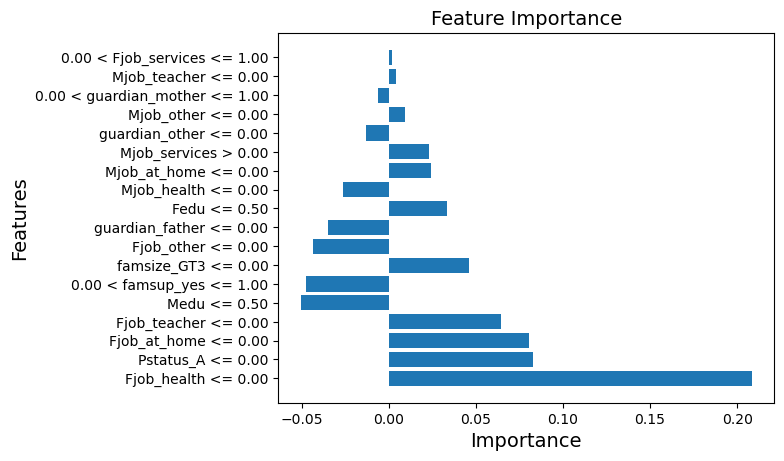

In [248]:
import matplotlib.pyplot as plt

features, values = zip(*feature_importance)
plt.barh(features, values)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.savefig('images/question 3/LIME Feature Importance q3.png')
plt.show()

### LIME Explanation Plot

In [249]:
feature_contributions = explanation_lime.local_exp[1]

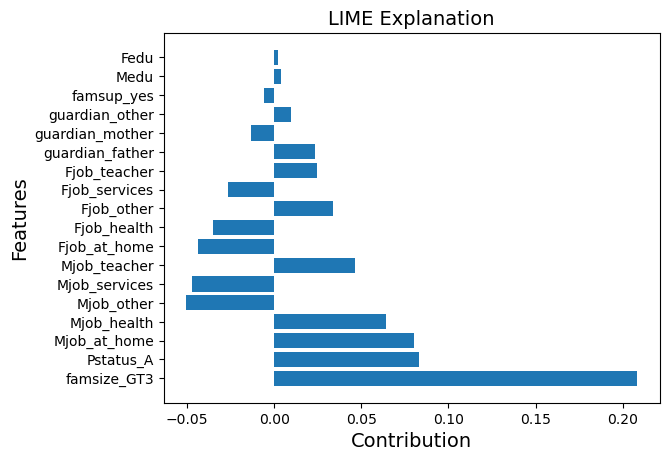

In [250]:
import matplotlib.pyplot as plt

features, contributions = zip(*feature_contributions)
plt.barh(feature_names, contributions)
plt.xlabel('Contribution')
plt.ylabel('Features')
plt.title('LIME Explanation')
plt.savefig('images/question 3/LIME Explanation Graph q3.png')
plt.show()

## Explanation for class 1

In [251]:
import matplotlib.pyplot as plt
print('Predicted: ',best_grid_rf.predict(X_test)[0])
print('Actual: ', y_test[0])
explanation_lime.show_in_notebook(show_table=True, show_all=False)
explanation_lime.save_to_file('images/question 3/LIME Prediction Probability for class 1 q3.html')

Predicted:  1.0
Actual:  1.0


### Explanation for class 0

In [252]:
#Perform the explanation on the 8th instance in the test data
explaination = explainer.explain_instance(X_test.iloc[8], best_grid_rf.predict_proba)

# show the result of the model's explaination
print('Predicted: ',best_grid_rf.predict(X_test)[8])
print('Actual: ', y_test[8])
explaination.show_in_notebook(show_table = True, show_all = False,)
explaination.save_to_file('images/question 3/LIME Prediction Probability for class 0 q3.html')


Predicted:  0.0
Actual:  0.0


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


In [253]:
pd.DataFrame({'y_test': y_test, 'y_pred': best_grid_rf.predict(X_test)}).head(10)

y_test  y_pred
0     1.0     1.0
1     1.0     1.0
2     1.0     0.0
3     1.0     0.0
4     0.0     0.0
5     0.0     1.0
6     0.0     0.0
7     1.0     1.0
8     0.0     0.0
9     0.0     0.0

# SHAP

In [218]:
import shap
import matplotlib.pyplot as plt

#model = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=500, n_jobs=-1, oob_score=True, random_state=42)
#model.fit(X_train,y_train)

# Create a SHAP explainer
#explainer = shap.KernelExplainer(model.predict_proba,X_train)  # Replace "model" with your trained model
explainer = shap.Explainer(best_grid_rf)

# Calculate SHAP values for the entire dataset
shap_values = explainer.shap_values(X_train)  # Replace "X" with your input data

# Select the desired instance for explanation (index 0 in this example)
instance = X_train.iloc[0]  # Replace "X" with your input data

# Calculate the SHAP values for the selected instance
shap_values_instance = explainer.shap_values(instance)

# Plot the SHAP summary plot
#shap.summary_plot(shap_values, X_train)  # Replace "X" with your input data

# Plot the SHAP values for the selected instance
#shap.force_plot(explainer.expected_value, shap_values[0])

# Save the figures
#plt.savefig('images/shap_summary_plot.png', dpi=300)
#shap.save_html('images/shap_force_plot.html', shap.force_plot(explainer.expected_value, shap_values_instance, instance))

# Show the plots
#plt.show()


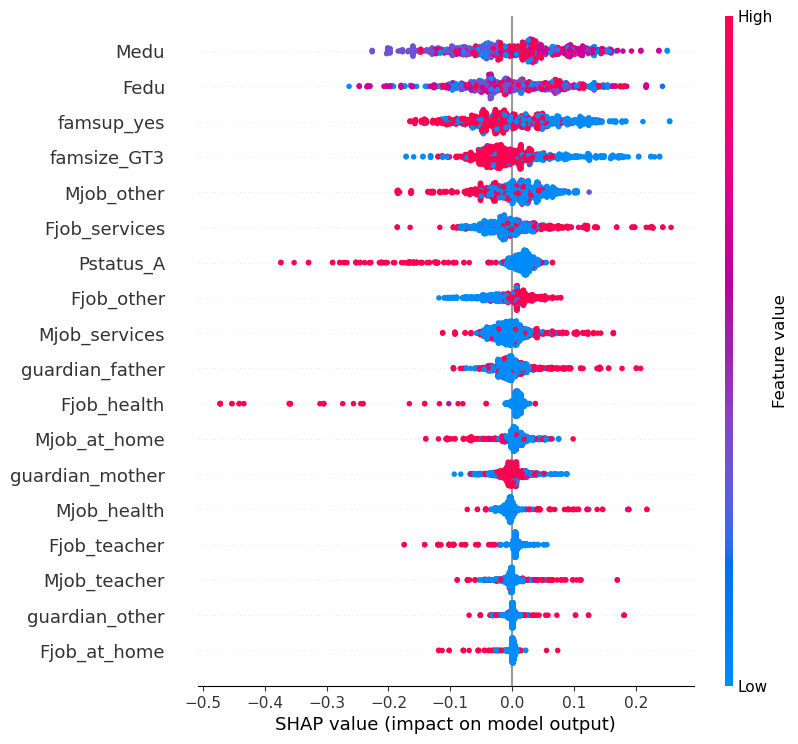

<Figure size 640x480 with 0 Axes>

In [219]:
from shap.plots import beeswarm
beeswarm(explainer(X_train)[:,:,1],max_display=20)
plt.savefig('images/question 3/beeswarm_plot.png',dpi=300, bbox_inches= 'tight')

In [220]:
pd.concat([X_test.loc[[190]],y_test.loc[[190]]], axis=1)

famsize_GT3  Pstatus_A  Mjob_at_home  Mjob_health  Mjob_other  \
190          1.0        0.0           0.0          0.0         1.0   

     Mjob_services  Mjob_teacher  Fjob_at_home  Fjob_health  Fjob_other  \
190            0.0           0.0           0.0          0.0         1.0   

     Fjob_services  Fjob_teacher  guardian_father  guardian_mother  \
190            0.0           0.0              0.0              1.0   

     guardian_other  famsup_yes  Medu  Fedu  alc  
190             0.0         1.0  0.25  0.25  1.0

In [221]:
# Calculate Shap values
choosen_instance = X_test.loc[[190]]
shap_values = explainer.shap_values(choosen_instance)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], choosen_instance)

[CV] END .........criterion=gini, max_depth=2, splitter=best; total time=   0.0s
[CV] END .......criterion=gini, max_depth=2, splitter=random; total time=   0.0s
[CV] END .........criterion=gini, max_depth=3, splitter=best; total time=   0.0s
[CV] END ....criterion=entropy, max_depth=2, splitter=random; total time=   0.0s
[CV] END ....criterion=entropy, max_depth=2, splitter=random; total time=   0.0s
[CV] END ......criterion=entropy, max_depth=3, splitter=best; total time=   0.0s
[CV] END ......criterion=entropy, max_depth=3, splitter=best; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=3; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=3; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=3; total time=   0.0s
[CV] END ...................

[CV] END break_ties=False, decision_function_shape=ovr, gamma=scale, kernel=rbf, probability=False, random_state=42, shrinking=False; total time=   0.1s
[CV] END break_ties=False, decision_function_shape=ovr, gamma=scale, kernel=rbf, probability=False, random_state=None, shrinking=True; total time=   0.1s
[CV] END break_ties=False, decision_function_shape=ovr, gamma=scale, kernel=rbf, probability=False, random_state=None, shrinking=True; total time=   0.1s
[CV] END break_ties=False, decision_function_shape=ovr, gamma=scale, kernel=rbf, probability=False, random_state=None, shrinking=False; total time=   0.1s
[CV] END break_ties=False, decision_function_shape=ovr, gamma=scale, kernel=rbf, probability=False, random_state=None, shrinking=False; total time=   0.1s
[CV] END break_ties=False, decision_function_shape=ovr, gamma=scale, kernel=sigmoid, probability=True, random_state=42, shrinking=False; total time=   0.3s
[CV] END break_ties=False, decision_function_shape=ovr, gamma=scale, kern

[CV] END break_ties=False, decision_function_shape=ovr, gamma=scale, kernel=rbf, probability=False, random_state=None, shrinking=False; total time=   0.1s
[CV] END break_ties=False, decision_function_shape=ovr, gamma=scale, kernel=sigmoid, probability=True, random_state=42, shrinking=False; total time=   0.3s
[CV] END break_ties=False, decision_function_shape=ovr, gamma=scale, kernel=sigmoid, probability=True, random_state=42, shrinking=False; total time=   0.3s
[CV] END break_ties=False, decision_function_shape=ovr, gamma=scale, kernel=sigmoid, probability=True, random_state=None, shrinking=True; total time=   0.3s
[CV] END break_ties=False, decision_function_shape=ovr, gamma=scale, kernel=sigmoid, probability=True, random_state=None, shrinking=True; total time=   0.3s
[CV] END break_ties=False, decision_function_shape=ovr, gamma=scale, kernel=sigmoid, probability=False, random_state=42, shrinking=True; total time=   0.1s
[CV] END break_ties=False, decision_function_shape=ovr, gamma=s

[CV] END break_ties=False, decision_function_shape=ovo, gamma=auto, kernel=poly, probability=False, random_state=None, shrinking=True; total time=   0.0s
[CV] END break_ties=False, decision_function_shape=ovo, gamma=auto, kernel=poly, probability=False, random_state=None, shrinking=True; total time=   0.1s
[CV] END break_ties=False, decision_function_shape=ovo, gamma=auto, kernel=poly, probability=False, random_state=None, shrinking=True; total time=   0.0s
[CV] END break_ties=False, decision_function_shape=ovo, gamma=auto, kernel=rbf, probability=True, random_state=42, shrinking=True; total time=   0.4s
[CV] END break_ties=False, decision_function_shape=ovo, gamma=auto, kernel=rbf, probability=True, random_state=42, shrinking=True; total time=   0.3s
[CV] END break_ties=False, decision_function_shape=ovo, gamma=auto, kernel=rbf, probability=True, random_state=42, shrinking=False; total time=   0.3s
[CV] END break_ties=False, decision_function_shape=ovo, gamma=auto, kernel=rbf, probabi

[CV] END .........criterion=gini, max_depth=2, splitter=best; total time=   0.0s
[CV] END .......criterion=gini, max_depth=2, splitter=random; total time=   0.0s
[CV] END .......criterion=gini, max_depth=2, splitter=random; total time=   0.0s
[CV] END .........criterion=gini, max_depth=3, splitter=best; total time=   0.0s
[CV] END ....criterion=entropy, max_depth=2, splitter=random; total time=   0.0s
[CV] END ....criterion=entropy, max_depth=2, splitter=random; total time=   0.0s
[CV] END ......criterion=entropy, max_depth=3, splitter=best; total time=   0.0s
[CV] END ......criterion=entropy, max_depth=3, splitter=best; total time=   0.0s
[CV] END ....criterion=entropy, max_depth=3, splitter=random; total time=   0.0s
[CV] END ....criterion=entropy, max_depth=3, splitter=random; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=3; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
[CV] END ...................